In [38]:
# Imports
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import peakutils 

In [39]:
from math import factorial
def savitzky_golay(y, window_size, order, deriv=0, rate=1):

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except (ValueError, msg):
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

## 486nm Graphs and Peak Difference

In [40]:
df = pd.read_csv('HD_486_4.csv')
df.columns=['ds','nA']

df = df.reset_index(drop = True)
df.ds = df.ds - df.ds[0]


In [41]:
yhat=savitzky_golay(np.asarray(df.nA),30001,3)
df['yhat'] = yhat

In [42]:
dfx = df[(df.ds < 40)]

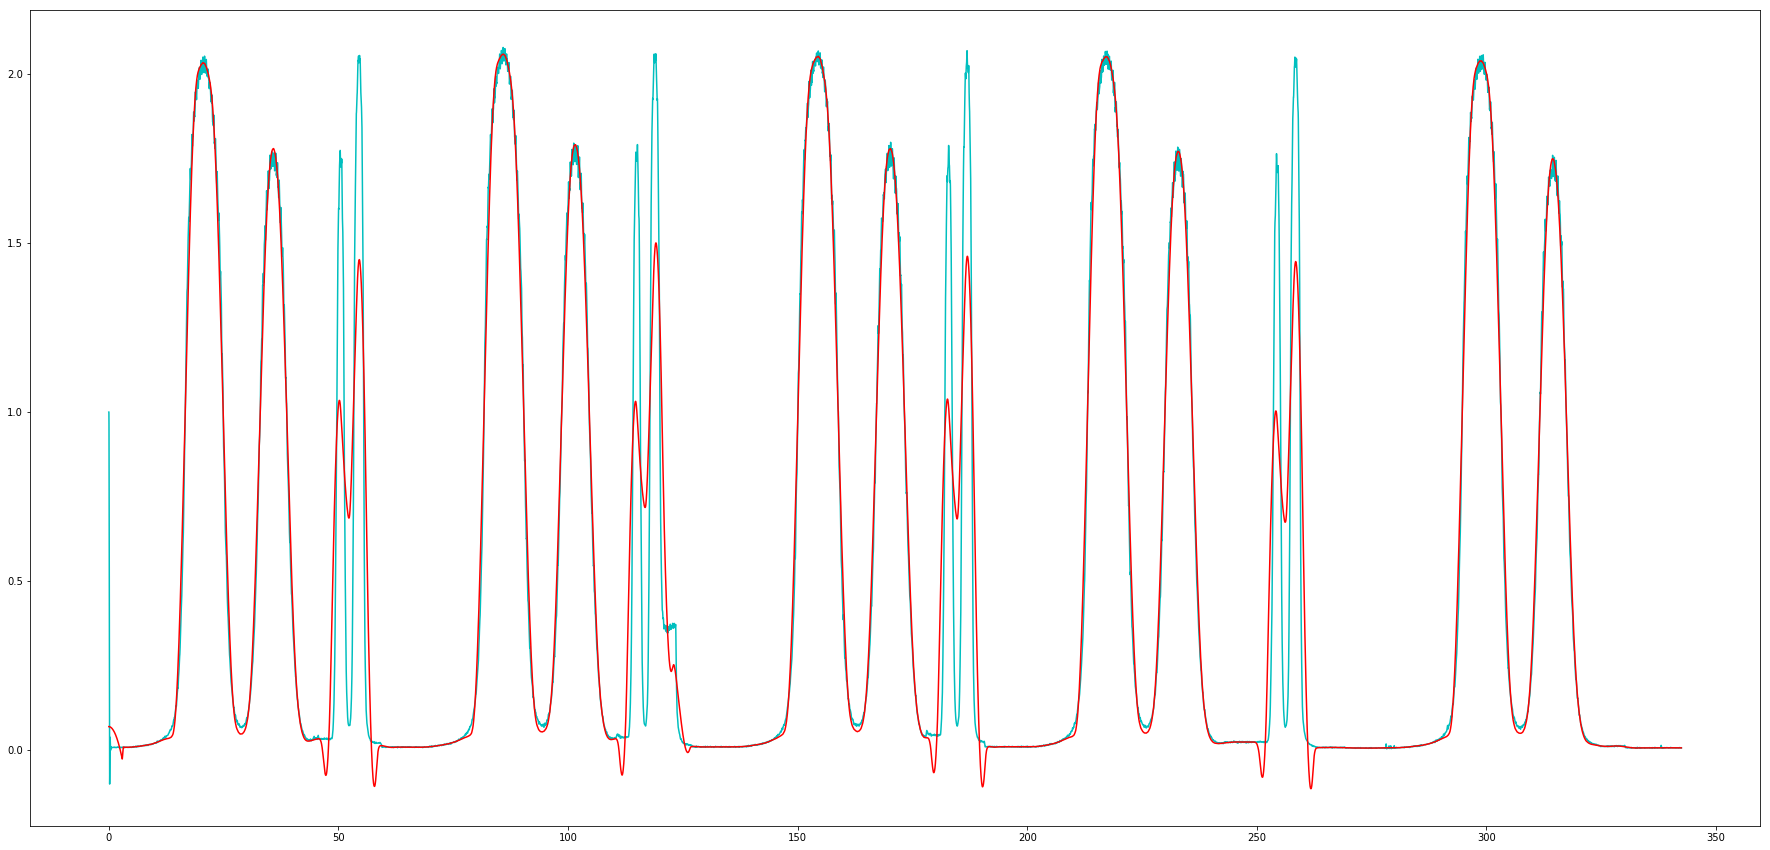

In [43]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(df.ds, df.nA, 'c')
plt.plot(df.ds, yhat, 'r')
plt.show()

In [45]:
#plt.figure(figsize=(30,9))
#plt.plot(dfx.ds, dfx.nA, 'c')
#plt.plot(dfx.ds, dfx.yhat, 'r')
#plt.show()

Find indexes where there is a peak using peakutil package

In [46]:
indexes = peakutils.indexes(yhat, thres=0.25, min_dist=10000)
xmax = [df.ds[i] for i in indexes]

In [47]:
print(indexes)

[ 101830  178032  249394  270896  426476  504594  569718  591729  767267
  845330  907090  928620 1078265 1156641 1262295 1283756 1484575 1561701]


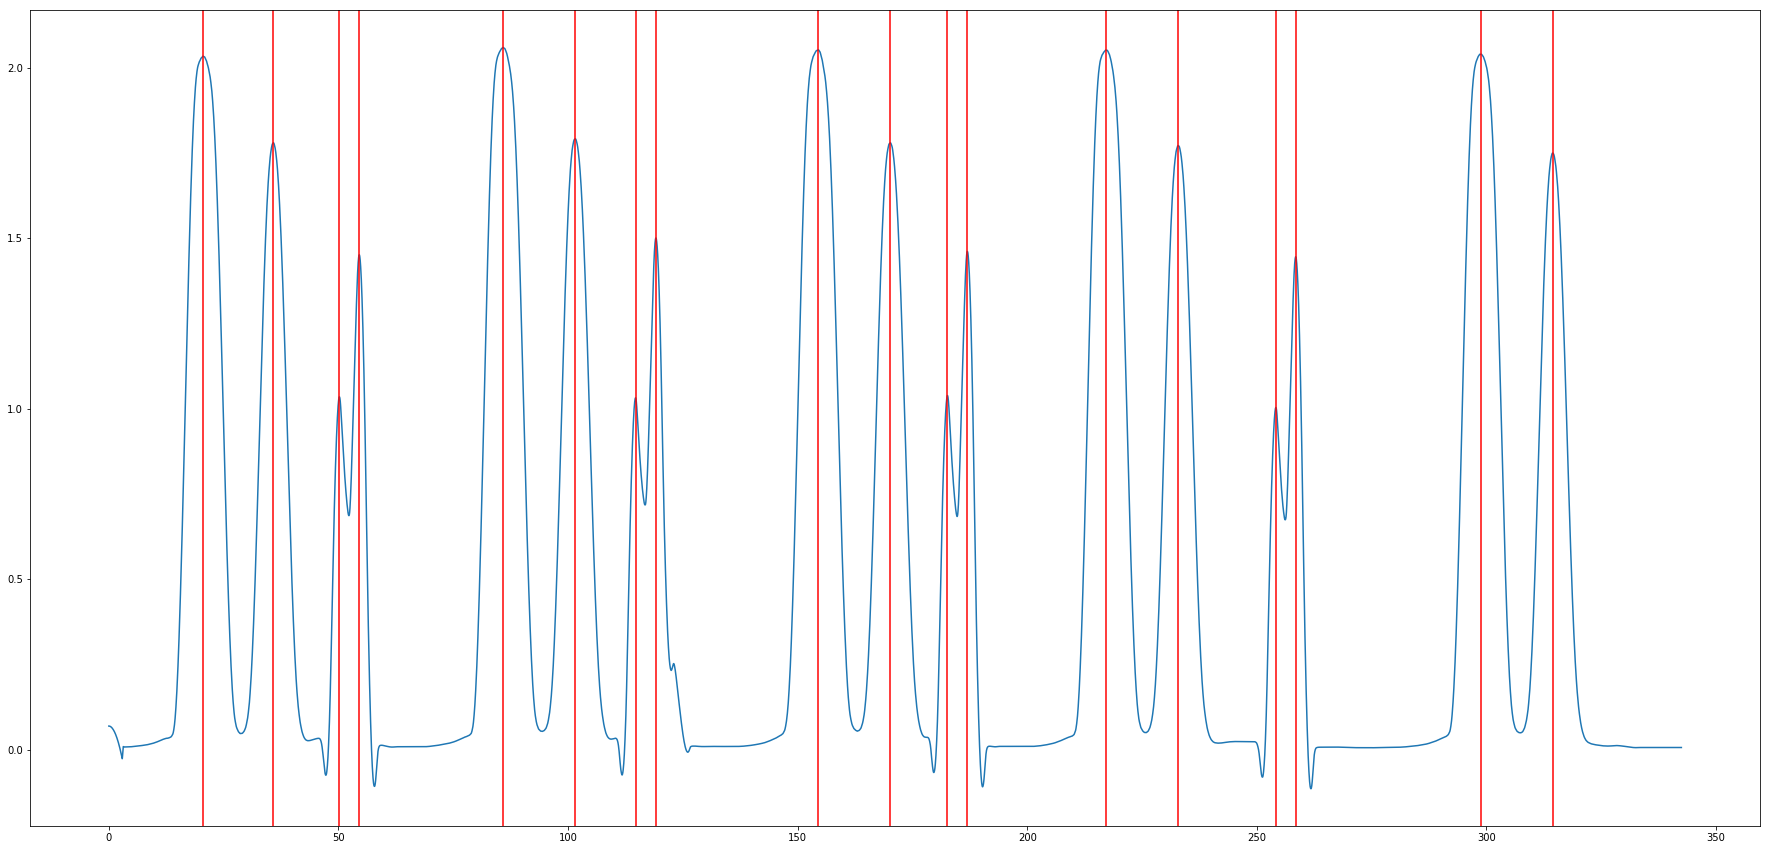

In [49]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(#df.ds, df.nA,
    df.ds, yhat)
for xc in xmax:
    plt.axvline(x=xc, color = 'r')
plt.show()

Peak detector finds correct peaks at :0,1,4,5,8,9

In [54]:
ind = 0, 1, 4, 5, 8, 9, 12, 13, 16, 17  

In [55]:
xmax_2 = [xmax[i] for i in ind]

Validation of correct peaks

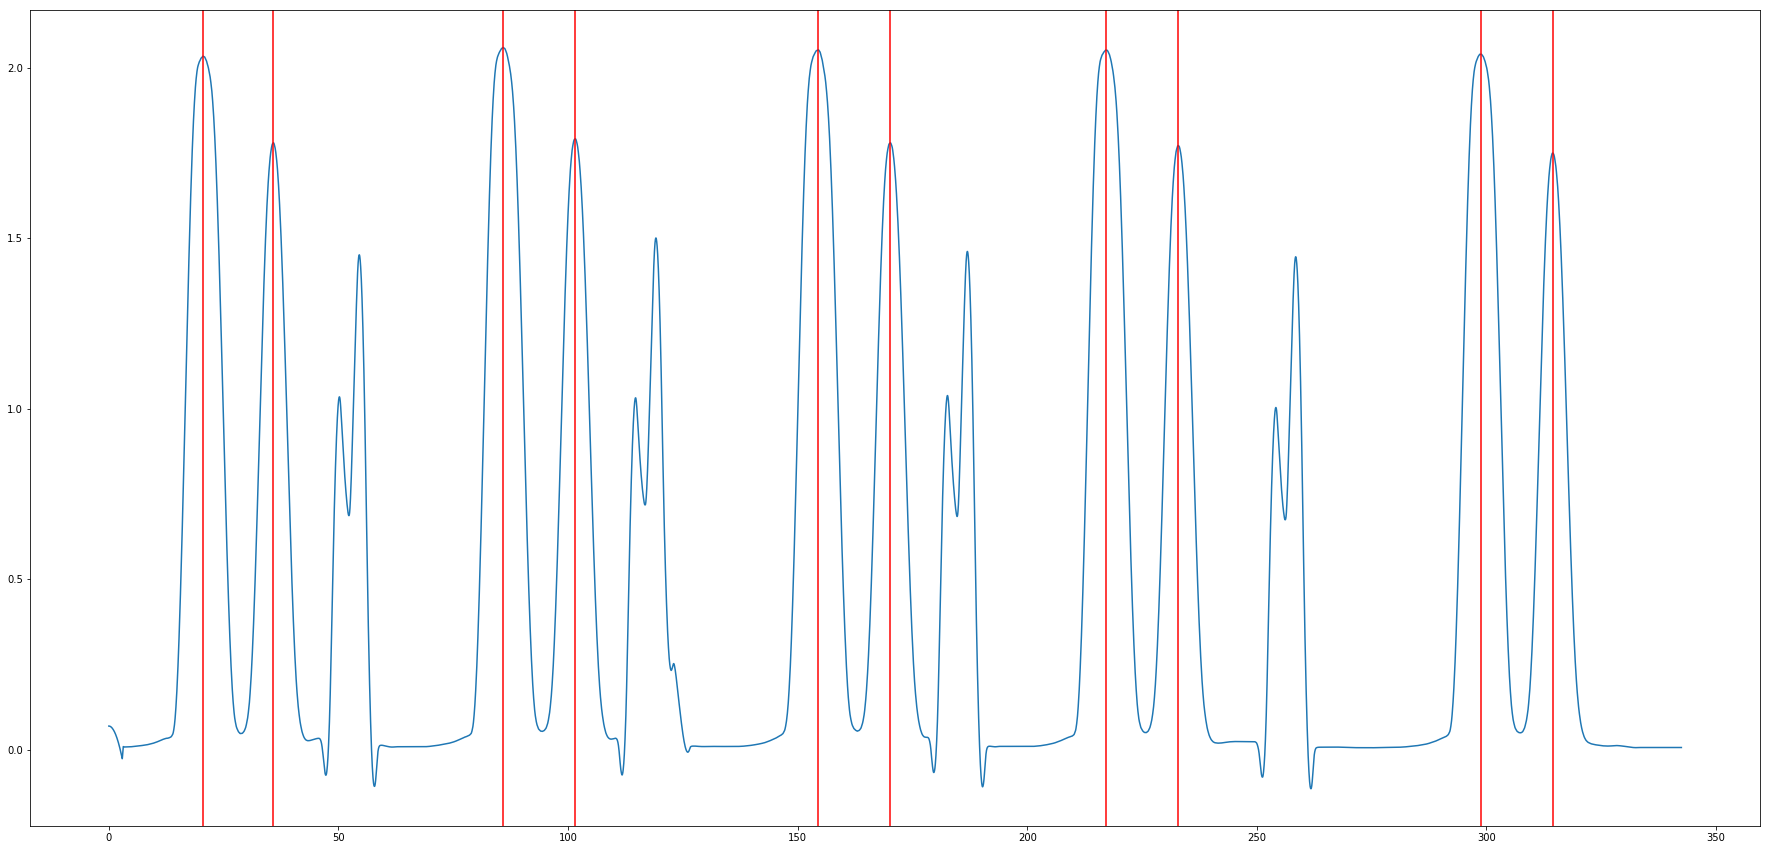

In [56]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(#df.ds, df.nA,
    df.ds, yhat)
xcoords = [0.22058956, 0.33088437, 2.20589566]
for xc in xmax_2:
    plt.axvline(x=xc, color = 'r')
plt.show()

In [57]:
xmax = [indexes[i] for i in ind]
dfpeaks = df.iloc[xmax].reset_index(drop = True)

In [58]:
dfpeaks

,ds,nA,yhat
0,20.500372,2.047341,2.033900
1,35.842556,1.766129,1.779755
2,85.860188,2.078831,2.059334
3,101.587580,1.781385,1.791254
4,154.470844,2.065822,2.052783
5,170.187236,1.756231,1.779822
6,217.083604,2.048740,2.051670
7,232.863620,1.735882,1.771505
8,298.880724,2.051802,2.039633
9,314.403156,1.759777,1.749752


Calculating isotope shifts

In [59]:
diff = []
for i in range(1,int(len(dfpeaks)/2) + 1):
    d = (dfpeaks.ds[i*2-1] - dfpeaks.ds[i*2-2])/12
    diff.append(d)
    

In [60]:
print(diff)
avg = sum(diff)/len(diff)
print(avg)
print()

[1.2785153333333337, 1.3106160000000007, 1.3096993333333344, 1.3150013333333324, 1.2935359999999985]
1.3014736

